In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sample/sample_labels.csv
/kaggle/input/sample/sample/images/00005403_000.png
/kaggle/input/sample/sample/images/00030152_003.png
/kaggle/input/sample/sample/images/00010007_133.png
/kaggle/input/sample/sample/images/00027211_000.png
/kaggle/input/sample/sample/images/00004579_004.png
/kaggle/input/sample/sample/images/00030079_046.png
/kaggle/input/sample/sample/images/00019831_004.png
/kaggle/input/sample/sample/images/00010007_057.png
/kaggle/input/sample/sample/images/00003205_002.png
/kaggle/input/sample/sample/images/00018052_003.png
/kaggle/input/sample/sample/images/00018288_000.png
/kaggle/input/sample/sample/images/00006769_010.png
/kaggle/input/sample/sample/images/00009067_003.png
/kaggle/input/sample/sample/images/00029464_001.png
/kaggle/input/sample/sample/images/00012370_001.png
/kaggle/input/sample/sample/images/00014379_006.png
/kaggle/input/sample/sample/images/00012659_004.png
/kaggle/input/sample/sample/images/00016992_000.png
/kaggle/input/sample/samp

/kaggle/input/sample/sample/images/00026305_001.png
/kaggle/input/sample/sample/images/00027427_001.png
/kaggle/input/sample/sample/images/00010552_005.png
/kaggle/input/sample/sample/images/00026810_013.png
/kaggle/input/sample/sample/images/00017137_008.png
/kaggle/input/sample/sample/images/00013951_001.png
/kaggle/input/sample/sample/images/00027213_017.png
/kaggle/input/sample/sample/images/00018080_008.png
/kaggle/input/sample/sample/images/00010012_034.png
/kaggle/input/sample/sample/images/00019107_001.png
/kaggle/input/sample/sample/images/00002878_004.png
/kaggle/input/sample/sample/images/00013608_006.png
/kaggle/input/sample/sample/images/00017691_008.png
/kaggle/input/sample/sample/images/00015414_015.png
/kaggle/input/sample/sample/images/00014826_004.png
/kaggle/input/sample/sample/images/00022829_002.png
/kaggle/input/sample/sample/images/00016390_000.png
/kaggle/input/sample/sample/images/00022815_080.png
/kaggle/input/sample/sample/images/00001404_001.png
/kaggle/inpu

/kaggle/input/sample/sample/images/00012291_012.png
/kaggle/input/sample/sample/images/00019661_000.png
/kaggle/input/sample/sample/images/00015175_001.png
/kaggle/input/sample/sample/images/00005132_000.png
/kaggle/input/sample/sample/images/00020455_000.png
/kaggle/input/sample/sample/images/00023209_000.png
/kaggle/input/sample/sample/images/00012178_005.png
/kaggle/input/sample/sample/images/00009860_000.png
/kaggle/input/sample/sample/images/00010509_004.png
/kaggle/input/sample/sample/images/00025628_020.png
/kaggle/input/sample/sample/images/00030636_010.png
/kaggle/input/sample/sample/images/00030797_000.png
/kaggle/input/sample/sample/images/00004392_000.png
/kaggle/input/sample/sample/images/00011234_000.png
/kaggle/input/sample/sample/images/00005421_001.png
/kaggle/input/sample/sample/images/00010426_000.png
/kaggle/input/sample/sample/images/00016620_007.png
/kaggle/input/sample/sample/images/00011925_019.png
/kaggle/input/sample/sample/images/00025303_021.png
/kaggle/inpu

/kaggle/input/sample/sample/images/00000289_001.png
/kaggle/input/sample/sample/images/00021018_000.png
/kaggle/input/sample/sample/images/00021484_001.png
/kaggle/input/sample/sample/images/00010835_000.png
/kaggle/input/sample/sample/images/00020213_009.png
/kaggle/input/sample/sample/images/00022893_000.png
/kaggle/input/sample/sample/images/00020430_000.png
/kaggle/input/sample/sample/images/00016984_000.png
/kaggle/input/sample/sample/images/00009016_003.png
/kaggle/input/sample/sample/images/00015058_005.png
/kaggle/input/sample/sample/images/00027128_001.png
/kaggle/input/sample/sample/images/00028974_020.png
/kaggle/input/sample/sample/images/00013601_008.png
/kaggle/input/sample/sample/images/00013144_000.png
/kaggle/input/sample/sample/images/00003758_002.png
/kaggle/input/sample/sample/images/00016410_058.png
/kaggle/input/sample/sample/images/00012079_003.png
/kaggle/input/sample/sample/images/00025163_000.png
/kaggle/input/sample/sample/images/00028509_010.png
/kaggle/inpu

In [18]:
import numpy as np
import pandas as pd
import os
from glob import iglob, glob
import matplotlib.pyplot as plt
from itertools import chain

%matplotlib inline

In [19]:
dataframe = pd.read_csv("/kaggle/input/sample/sample_labels.csv")
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/kaggle/input/sample/*','images*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', dataframe.shape[0])
dataframe['path'] = dataframe['Image Index'].map(all_image_paths.get)
dataframe['Patient Age'] = dataframe['Patient Age'].map(lambda x: int(x[:-1]))

Scans found: 5606 , Total Headers 5606


In [20]:
dataframe = dataframe[dataframe['Finding Labels'] != 'No Finding']
all_labels = np.unique(list(chain(*dataframe['Finding Labels'].map(lambda x: x.split('|')).tolist())))
pathology_list = all_labels
dataframe['path'] = dataframe['Image Index'].map(all_image_paths.get)
dataframe = dataframe.drop(['Patient Age', 'Patient Gender', 'Follow-up #', 'Patient ID', 'View Position', 
         'OriginalImageWidth', 'OriginalImageHeight', 'OriginalImagePixelSpacing_x','OriginalImagePixelSpacing_y'], axis=1)
for pathology in pathology_list :
    dataframe[pathology] = dataframe['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
dataframe = dataframe.drop(['Image Index', 'Finding Labels'], axis=1)

In [21]:
dataframe.head()

,path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,/kaggle/input/sample/sample/images/00000013_00...,0,0,0,0,0,1,0,0,1,0,0,1,0,1
1,/kaggle/input/sample/sample/images/00000013_02...,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,/kaggle/input/sample/sample/images/00000030_00...,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,/kaggle/input/sample/sample/images/00000032_00...,0,1,0,1,1,0,0,0,0,0,0,0,0,0
5,/kaggle/input/sample/sample/images/00000040_00...,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [22]:
dataframe['disease_vec'] = dataframe.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [23]:
dataframe.head()

,path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,disease_vec
0,/kaggle/input/sample/sample/images/00000013_00...,0,0,0,0,0,1,0,0,1,0,0,1,0,1,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]"
1,/kaggle/input/sample/sample/images/00000013_02...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,/kaggle/input/sample/sample/images/00000030_00...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,/kaggle/input/sample/sample/images/00000032_00...,0,1,0,1,1,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,/kaggle/input/sample/sample/images/00000040_00...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [24]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, 
                                   test_size = 0.25, 
                                   random_state = 2018)

In [25]:
X_train = train_df['path'].values.tolist()
y_train = np.asarray(train_df['disease_vec'].values.tolist())
X_test = test_df['path'].values.tolist()
y_test = np.asarray(test_df['disease_vec'].values.tolist())

In [26]:
print(X_train[0],y_train[0])

/kaggle/input/sample/sample/images/00028579_005.png [0 0 0 1 1 0 0 0 1 0 0 0 0 0]


In [27]:
X_test[0]

'/kaggle/input/sample/sample/images/00018734_000.png'

In [28]:
from skimage.io import imread, imshow
print(imread(X_train[0]).shape)
images_train = np.zeros([len(X_train),128,128])
for i, x in enumerate(X_train):
    image = imread(x, as_gray=True)[::8,::8]
    images_train[i] = (image - image.min())/(image.max() - image.min())
images_test = np.zeros([len(X_test),128,128])
for i, x in enumerate(X_test):
    image = imread(x, as_gray=True)[::8,::8]
    images_test[i] = (image - image.min())/(image.max() - image.min())

(1024, 1024)


In [29]:
X_train = images_train.reshape(len(X_train), 128, 128, 1)
X_test = images_test.reshape(len(X_test), 128, 128, 1)
X_train.astype('float32')

array([[[[0.63786006],
         [0.47736627],
         [0.22222222],
         ...,
         [0.4814815 ],
         [0.5020576 ],
         [0.5144033 ]],

        [[0.62139916],
         [0.47325101],
         [0.2345679 ],
         ...,
         [0.14814815],
         [0.14403293],
         [0.14403293]],

        [[0.6255144 ],
         [0.4814815 ],
         [0.22633745],
         ...,
         [0.05349794],
         [0.04938272],
         [0.04938272]],

        ...,

        [[0.13580246],
         [0.16872428],
         [0.25925925],
         ...,
         [0.05349794],
         [0.16049382],
         [0.34567901]],

        [[0.1563786 ],
         [0.18930042],
         [0.30452675],
         ...,
         [0.05761317],
         [0.16049382],
         [0.36625513]],

        [[0.20164609],
         [0.2345679 ],
         [0.35390946],
         ...,
         [0.06584362],
         [0.15226337],
         [0.34979424]]],


       [[[0.00421941],
         [0.00421941],
         [0.00

In [30]:
X_test[0].shape

(128, 128, 1)

In [32]:
from keras.models import Sequential
from keras.layers import Dropout, GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.applications.resnet import ResNet50
base_model1 = ResNet50(input_shape = (128, 128, 1), 
                                 include_top = False, weights = None)
model1 = Sequential()
model1.add(base_model1)
model1.add(GlobalAveragePooling2D())
model1.add(Dropout(0.3))
model1.add(Dense(512))
model1.add(Dropout(0.3))
model1.add(Dense(len(all_labels), activation='softmax'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 4, 4, 2048)        23581440  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                7182      
Total params: 24,637,710
Trainable params: 24,584,590
Non-trainable params: 53,120
_____________________________________

In [33]:
history1 = model1.fit(X_train, y_train, epochs = 30, verbose=1, validation_data=(X_test, y_test))

Train on 1921 samples, validate on 641 samples
Epoch 1/30
1921/1921 [==============================] - 27s 14ms/step - loss: 0.6478 - accuracy: 0.8807 - val_loss: 0.3214 - val_accuracy: 0.8918
Epoch 2/30
1921/1921 [==============================] - 8s 4ms/step - loss: 0.4025 - accuracy: 0.8889 - val_loss: 1.3039 - val_accuracy: 0.8770
Epoch 3/30
1921/1921 [==============================] - 8s 4ms/step - loss: 0.4248 - accuracy: 0.8880 - val_loss: 0.5447 - val_accuracy: 0.8896
Epoch 4/30
1921/1921 [==============================] - 8s 4ms/step - loss: 0.4240 - accuracy: 0.8877 - val_loss: 1.4877 - val_accuracy: 0.8713
Epoch 5/30
1921/1921 [==============================] - 8s 4ms/step - loss: 0.4106 - accuracy: 0.8875 - val_loss: 0.6647 - val_accuracy: 0.8853
Epoch 6/30
1921/1921 [==============================] - 8s 4ms/step - loss: 0.4280 - accuracy: 0.8879 - val_loss: 2.2227 - val_accuracy: 0.8556
Epoch 7/30
1921/1921 [==============================] - 8s 4ms/step - loss: 0.4141 - ac

In [34]:
from keras.models import Sequential
from keras.layers import Dropout, GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.applications.xception import Xception
base_model = Xception(input_shape = (128, 128, 1), 
                                 include_top = False, weights = None)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Dense(len(all_labels), activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 4, 4, 2048)        20860904  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 14)                7182      
Total params: 21,917,174
Trainable params: 21,862,646
Non-trainable params: 54,528
_____________________________________

In [35]:
history = model.fit(X_train, y_train, epochs = 30, verbose=1, validation_data=(X_test, y_test))

Train on 1921 samples, validate on 641 samples
Epoch 1/30
1921/1921 [==============================] - 21s 11ms/step - loss: 0.3491 - accuracy: 0.8879 - val_loss: 0.3503 - val_accuracy: 0.8918
Epoch 2/30
1921/1921 [==============================] - 10s 5ms/step - loss: 0.3176 - accuracy: 0.8897 - val_loss: 0.3499 - val_accuracy: 0.8918
Epoch 3/30
1921/1921 [==============================] - 10s 5ms/step - loss: 0.3181 - accuracy: 0.8896 - val_loss: 0.3490 - val_accuracy: 0.8918
Epoch 4/30
1921/1921 [==============================] - 10s 5ms/step - loss: 0.3118 - accuracy: 0.8902 - val_loss: 0.3472 - val_accuracy: 0.8918
Epoch 5/30
1921/1921 [==============================] - 10s 5ms/step - loss: 0.3086 - accuracy: 0.8899 - val_loss: 0.3448 - val_accuracy: 0.8918
Epoch 6/30
1921/1921 [==============================] - 10s 5ms/step - loss: 0.3104 - accuracy: 0.8901 - val_loss: 0.3366 - val_accuracy: 0.8918
Epoch 7/30
1921/1921 [==============================] - 10s 5ms/step - loss: 0.304

In [48]:
def history_plot(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [50]:
predictions1 = model1.predict(X_test, batch_size = 32, verbose = True)

641/641 [==============================] - 4s 6ms/step


In [39]:
predictions = model.predict(X_test, batch_size = 32, verbose = True)

641/641 [==============================] - 4s 6ms/step


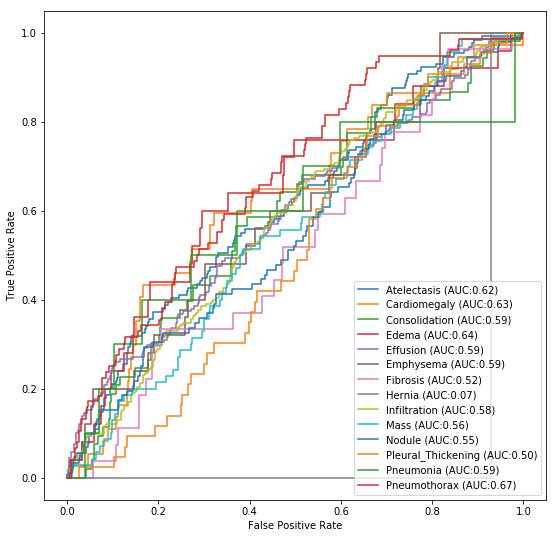

In [40]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), predictions[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

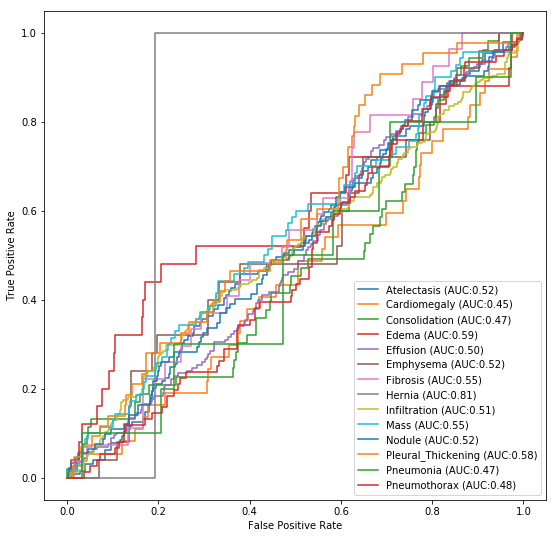

In [51]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), predictions1[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

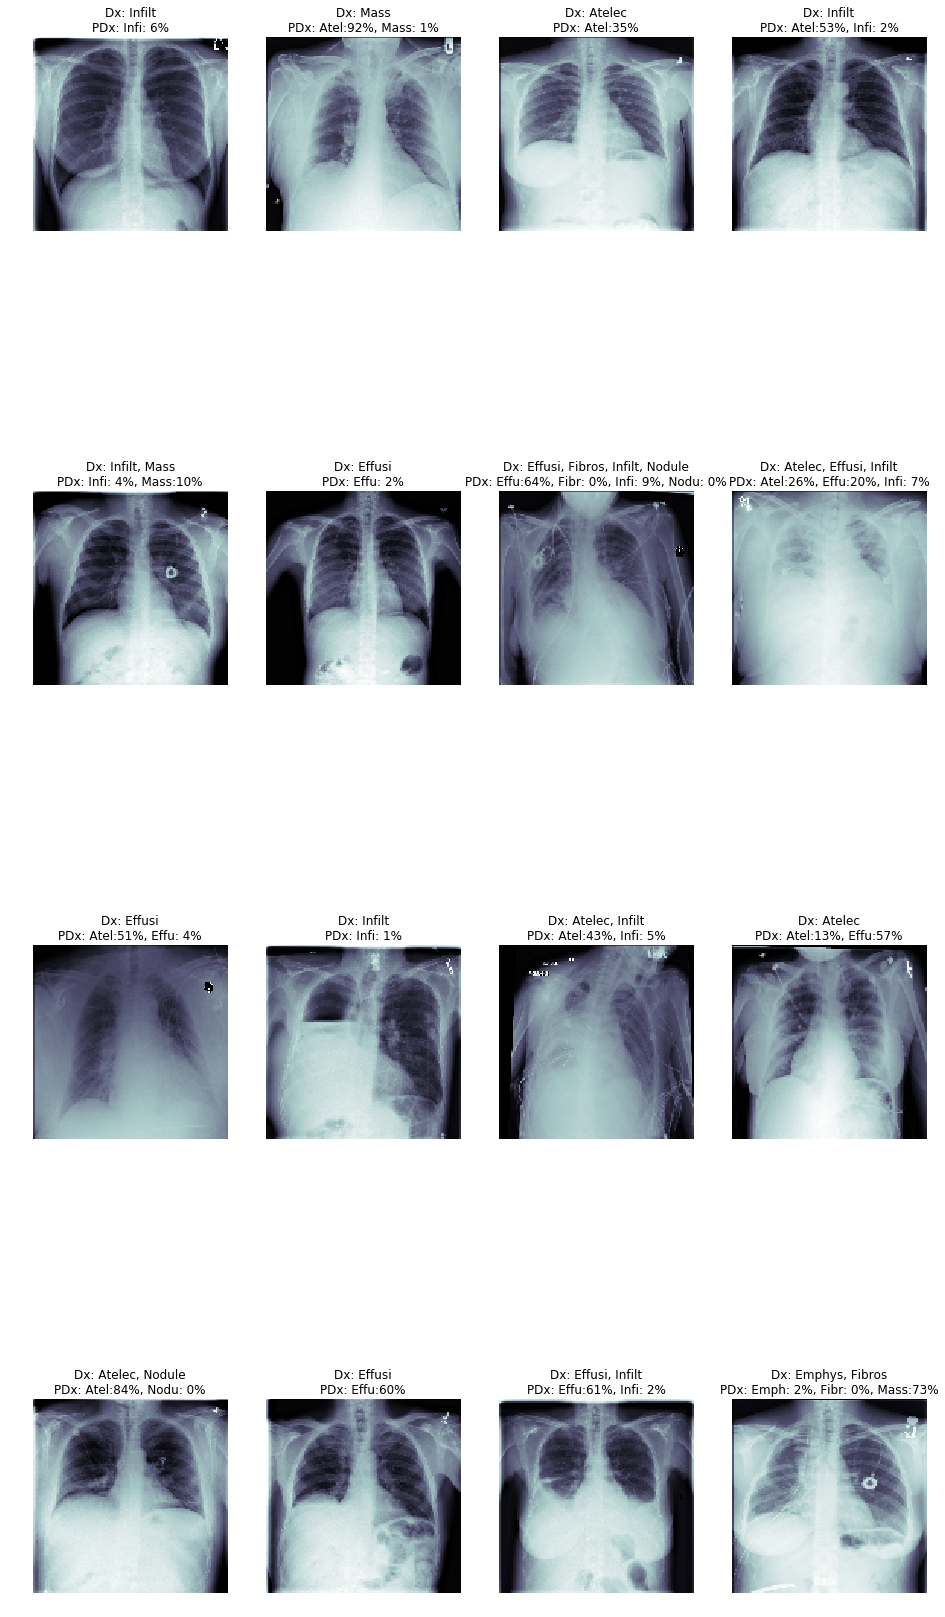

In [41]:
sickest_idx = np.argsort(np.sum(y_test, 1)<1)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(X_test[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels, y_test[idx]) if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels, y_test[idx], predictions[idx]) if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')

In [ ]:
sickest_idx = np.argsort(np.sum(y_test, 1)<1)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(X_test[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels, y_test[idx]) if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels, y_test[idx], predictions1[idx]) if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')

In [ ]:
model.save('chest-xray.h5')

In [ ]:
from sklearn.externals import joblib
joblib.dump(model, 'model.pkl')
print("Model dumped!")

In [1]:
import warnings
warnings.filterwarnings("ignore")
from keras.models import load_model
new_model = load_model("/home/udit/Music/chest-xray.h5")

Using TensorFlow backend.














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [2]:
def predictor(trial):
    w = [trial]
    import numpy as np
    from skimage.io import imread, imshow
    images_t = np.zeros([len(w),128,128])
    for i, x in enumerate(w):
        image = imread(x, as_gray=True)[::8,::8]
        images_t[i] = (image - image.min())/(image.max() - image.min())
    X_t = images_t.reshape(len(w), 128, 128, 1)
    p = new_model.predict(X_t)
    class_p = [ 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia','Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']
    d1={}
    for i in range (len(class_p)):
        d1[class_p[i]]=p[0][i]*100
    return d1;

In [7]:
test_1 = '/home/udit/Music/xray_dataset/00000632_012.png'
result = predictor(test_1)

In [8]:
print(result)

{'Atelectasis': 17.62494593858719, 'Cardiomegaly': 0.02977845724672079, 'Effusion': 0.331479893065989, 'Infiltration': 0.20029880106449127, 'Mass': 1.0997718200087547, 'Nodule': 1.6219910234212875, 'Pneumonia': 0.05461637629196048, 'Pneumothorax': 0.007258542609633878, 'Consolidation': 75.63871741294861, 'Edema': 2.1134091541171074, 'Emphysema': 0.547063210979104, 'Fibrosis': 0.010518768249312416, 'Pleural_Thickening': 0.05282462225295603, 'Hernia': 0.6673377007246017}


In [9]:
#max(d1, key=d1.get)
import heapq
heapq.nlargest(5, result, key=result.get)

['Consolidation', 'Atelectasis', 'Edema', 'Nodule', 'Mass']

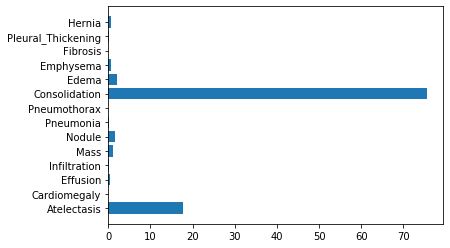

In [10]:
import matplotlib.pyplot as plt
plt.barh(range(len(result)), list(result.values()), align='center', )
plt.yticks(range(len(result)), list(result.keys()))

plt.show()